<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/prediction_with_CNN_COMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

data=np.load(path+'datacomb.npy')
target=np.load(path+'targetcomb.npy')

In [3]:
print(data.shape)
print(target.shape)
print(data.shape[1:])

(2561, 50, 4)
(2561,)
(50, 4)


In [4]:
train_data=data[:1792]
train_target=target[:1792]

test_data=data[1792:]
test_target=target[1792:]

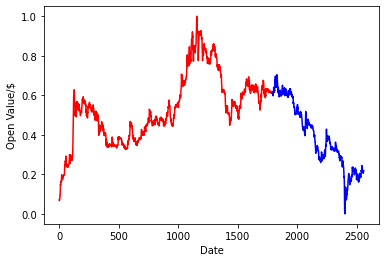

In [5]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1792,2561,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dense,Dropout,Activation,Flatten

model=Sequential()

model.add(Conv1D(filters=128,kernel_size=3,input_shape=(data.shape[1:])))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

"""model.add(Conv1D(filters=256,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
"""

"""model.add(Conv1D(filters=128,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
"""
"""model.add(Conv1D(filters=64,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))"""
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam',metrics=['Accuracy','mse', 'mae', 'mape'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 48, 128)           1664      
_________________________________________________________________
activation (Activation)      (None, 48, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3073      
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
______________________________________________________

In [7]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
51/51 [==============================] - 1s 17ms/step - loss: 0.0591 - accuracy: 0.0000e+00 - mse: 0.0591 - mae: 0.1794 - mape: 34.5229 - val_loss: 9.3841e-04 - val_accuracy: 0.0000e+00 - val_mse: 9.3841e-04 - val_mae: 0.0204 - val_mape: 3.3444
Epoch 2/200
51/51 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - mse: 0.0058 - mae: 0.0588 - mape: 11.3793 - val_loss: 0.0010 - val_accuracy: 0.0000e+00 - val_mse: 0.0010 - val_mae: 0.0233 - val_mape: 3.8695
Epoch 3/200
51/51 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - mse: 0.0051 - mae: 0.0557 - mape: 10.8033 - val_loss: 0.0012 - val_accuracy: 0.0000e+00 - val_mse: 0.0012 - val_mae: 0.0279 - val_mape: 4.6147
Epoch 4/200
51/51 [==============================] - 0s 8ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - mse: 0.0043 - mae: 0.0503 - mape: 9.6045 - val_loss: 0.0012 - val_accuracy: 0.0000e+00 - val_mse: 0.0012 - val_mae: 0.0285 - val_mape: 4.5611


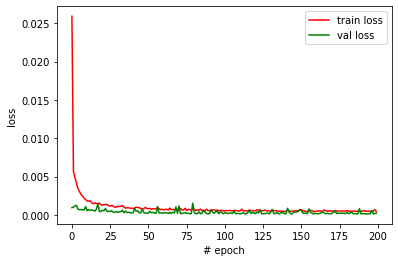

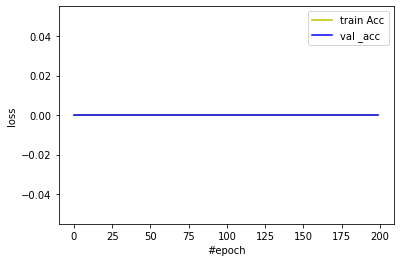

In [8]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],'y',label='train Acc')
plt.plot(history.history['val_accuracy'],'b',label='val _acc')
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9609019862898692


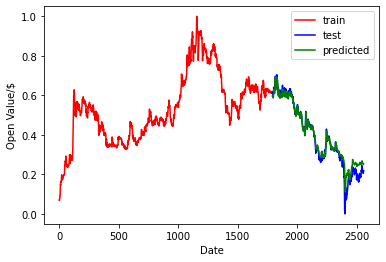

In [10]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1792,2561,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

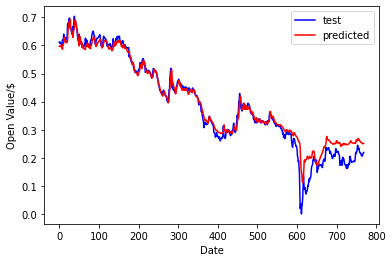

In [11]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()